## ${\tt CytOpt}$ on OptimalFlowData

In this notebook, we test our method on the Optimalflow data set. To apply our method we have selected 8 cell populations that where presented in all the data sets labelled from 1 to 21.

Here we use data set number one as a source and data set number nineteen as a target data set.

##### import modules and functions

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
import sys
sys.path.append("../Functions")
from Tools_CytOpt_Descent_Ascent import *
from Tools_CytOpt_MinMax_Swapping import *

##### import data

One can test ${\tt CytOpt}$ on other data sets of the optimalflow database by changing the numbers 1 and 19 by whatever number between 1 and 21.

In [3]:
Cyto_one = pd.read_csv("../Data/OF_Cytometry1.csv",
                      usecols = np.arange(1,12))
Cyto_two = pd.read_csv("../Data/OF_Cytometry19.csv",
                      usecols = np.arange(1,12))

In [6]:
Cyto_one.head()

,CD19/TCRgd:PE Cy7-A LOGICAL,CD38:APC H7-A LOGICAL,CD3:APC-A LOGICAL,CD4+CD20:PB-A LOGICAL,CD45:PO-A LOGICAL,CD56+IgK:PE-A LOGICAL,CD5:PerCP Cy5-5-A LOGICAL,CD8+IgL:FITC-A LOGICAL,FSC-A LINEAR,SSC-A Exp-SSC Low,Population ID (name)
0,2210,3522,6782,4611,5759,2654,5813,6244,1939,1509,CD8+CD4-
1,2867,3445,6537,5799,5686,2171,6634,2732,1839,1674,CD4+CD8-
2,2341,1913,3569,4161,5245,3340,3463,3592,2925,6558,Eosinophils
3,2889,3508,4070,4575,5278,3602,4025,4167,3327,7331,Eosinophils
4,2287,2234,2288,1479,5404,5213,2641,3918,1884,1697,CD56dim


Selection of the features and the labels

In [4]:
values_one = np.asarray(Cyto_one.iloc[:,np.arange(0,10)])
labels_one = np.asarray(Cyto_one.iloc[:,10])
values_two = np.asarray(Cyto_two.iloc[:,np.arange(0,10)])
labels_two = np.asarray(Cyto_two.iloc[:,10])

#### Encoding of the cell populations

In [8]:
Encoder = LabelEncoder()
Encoder.fit(np.hstack((labels_one, labels_two)))
Lab_one = Encoder.transform(labels_one)
Lab_two = Encoder.transform(labels_two)

#### 2D projection of the two data sets handled

In [9]:
Id_centre = [1,2]
Names = ['Cytometry 1', 'Cytometry 19']
Values = [values_one, values_two]
Clusters = [Lab_one, Lab_two]

In [10]:
sns.set()

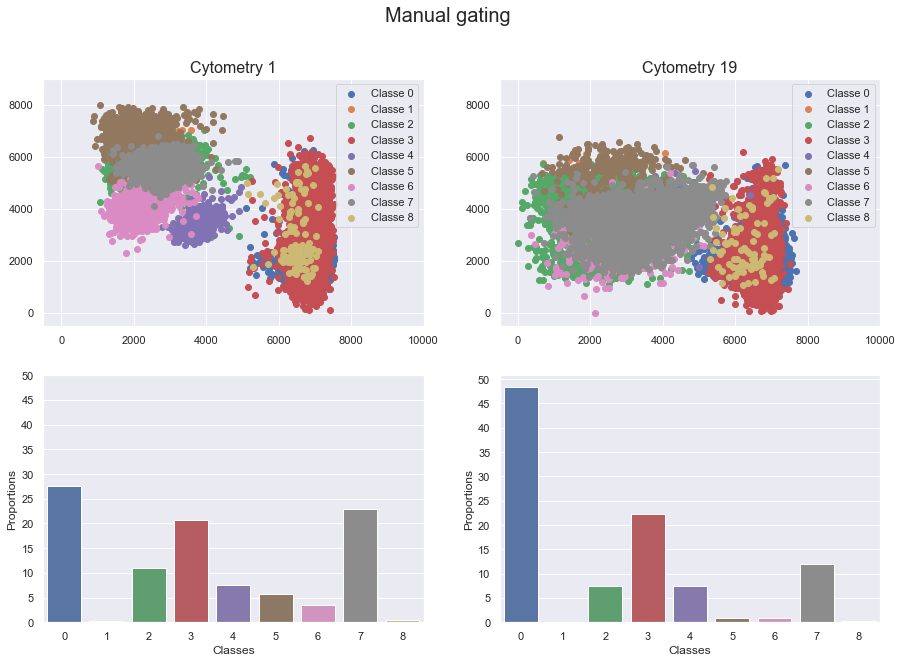

In [11]:
plt.figure(figsize = (15,10))
plt.suptitle('Manual gating', size = 20)
for it, nom, X, Y in zip(Id_centre, Names, Values, Clusters):
    plt.subplot(2,2,it)
    for cl in range(9):
        plt.scatter(X[:,2][Y == cl], X[:,5][Y == cl], label = 'Classe {}'.format(cl))
    plt.title(nom, size = 16)
    plt.xlim(-500,10000)
    plt.ylim(-500,9000)
    plt.xlabel('')
    plt.ylabel('')
    plt.legend(loc = 'upper right')
    plt.subplot(2,2,it+2)
    sns.barplot(x=Y, y=Y, estimator=lambda x: len(x) / len(Y) * 100)
    plt.yticks([5*k for k in range(11)])
    plt.xlabel('Classes')
    plt.ylabel('Proportions')


##### Preprocessing of the data

In [8]:
X_source = values_one * (values_one > 0)
X_target = values_two * (values_two > 0)

scaler = MinMaxScaler()
X_source = scaler.fit_transform(X_source)
X_target = scaler.fit_transform(X_target)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


##### Benchmark class proportions in the target data set

In [9]:
h_target = np.zeros(9)
for k in range(9):
    h_target[k] = np.sum(Lab_two == k)/len(Lab_two)

print(h_target)

[4.83727763e-01 4.47127208e-04 7.55325604e-02 2.23595542e-01
 7.46383060e-02 9.67711028e-03 8.62316758e-03 1.20724346e-01
 3.03407748e-03]


#### CytOpt with descent-ascent procedure

In [19]:
n_it_grad = 10000
n_it_sto = 10
pas_grad = 10
eps=0.0005

In [20]:
t0 = time.time()
h_hat = cytopt_desas(n_it_grad=n_it_grad, X=X_source, Lab_source=Lab_one, 
                            Y=X_target, n_it_sto=n_it_sto, step_grad=pas_grad, eps=eps)
Elapsed_time = time.time() - t0

Iteration  0
Curent h_hat
[0.11160667 0.11083427 0.11119858 0.11036272 0.11207956 0.11071428
 0.11242965 0.11116078 0.10961349]
Iteration  1000
Curent h_hat
[0.47982652 0.00947155 0.07630862 0.19277888 0.06692738 0.03287164
 0.03229975 0.10069193 0.00882373]
Iteration  2000
Curent h_hat
[0.51722793 0.00728654 0.07403682 0.17111934 0.07418364 0.02350681
 0.02241463 0.10312421 0.00710009]
Iteration  3000
Curent h_hat
[0.53744537 0.0054972  0.05955649 0.19217237 0.07472172 0.01846279
 0.01712373 0.08992352 0.0050968 ]
Iteration  4000
Curent h_hat
[0.48880859 0.00567066 0.06695982 0.23122821 0.07149815 0.01991656
 0.01716154 0.09306055 0.00569591]
Iteration  5000
Curent h_hat
[0.51997512 0.00546679 0.05945155 0.19937267 0.09304358 0.01903036
 0.01642581 0.08198347 0.00525066]
Iteration  6000
Curent h_hat
[0.49338036 0.00553295 0.06650362 0.21748945 0.0808699  0.01833249
 0.01567914 0.0970006  0.0052115 ]
Iteration  7000
Curent h_hat
[0.46263891 0.00530325 0.07228811 0.23567137 0.08941133 0

In [21]:
print('Elapsed time : ',Elapsed_time/60, 'mins')

Elapsed time :  16.417804741859435 mins


#### CytOpt with the minmax swapping procedure

In [12]:
lbd = 0.0001
eps_two = 0.0001
n_iter = 10000
step_size = 5
power = 0.99

In [14]:
t0 = time.time()
results = cytopt_minmax_monitor(lbd, eps_two, X_source, X_target, Lab_one, n_iter,
                            h_target, step=step_size, power=power)
elapsed_time = time.time() - t0

In [15]:
print('Elapsed time : ',elapsed_time/60, 'Mins')

Elapsed time :  1.7290645996729532 Mins


In [18]:
h_hat2 = results[0]
print(h_hat2)

[4.83246813e-01 7.62666573e-11 8.68703380e-02 2.36978981e-01
 8.70579130e-02 1.30427082e-02 9.28524305e-03 8.35178751e-02
 1.28611592e-07]


##### Illustration of the results

In [23]:
Proportion = np.hstack((h_hat, h_hat2, h_target))
Classes = np.tile(np.arange(9),3)
Methode = np.repeat(['CytOpt_DesAsc', 'CytOpt_Minmax', 'Manual'], 9)
df_res1 = pd.DataFrame({'Proportions':Proportion, 'Classes':Classes, 'Methode':Methode})

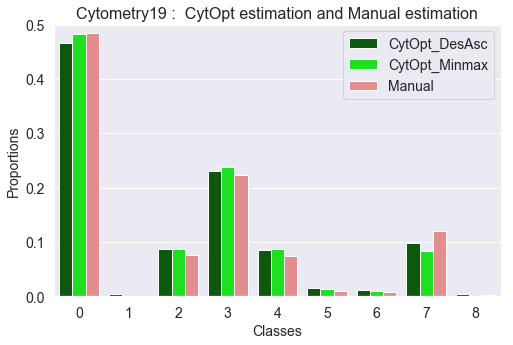

In [27]:
plt.figure(figsize=(8,5))
sns.barplot(x='Classes', y='Proportions', hue='Methode', data=df_res1,
           palette=['darkgreen', 'lime', 'lightcoral'])
plt.title('Cytometry19 :  CytOpt estimation and Manual estimation', size=16)
plt.legend(loc = 'best', fontsize=14)
plt.xlabel('Classes', size=14)
plt.ylabel('Proportions', size=14)
plt.ylim(0,0.5)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14);
#plt.savefig('Barplot_Stan3C_prepocessing.eps', format='eps')